# **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note** If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


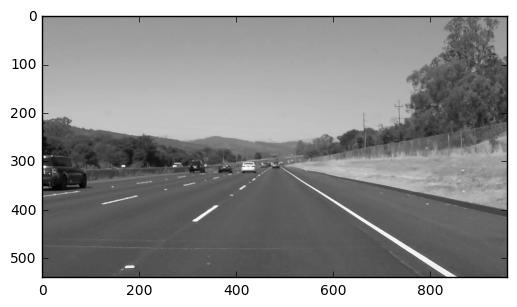

In [2]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [65]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    left_points_x=[]
    right_points_x=[]
    left_points_y=[]
    right_points_y=[]
    left_slope=[]
    left_intercept=0
    right_slope=[]
    right_intercept=0
    y_min = 540
    y_max = img.shape[0]
    for line in lines:
        for x1,y1,x2,y2 in line:
            slope = (y2-y1)/(x2-x1)
#             intercept = (-slope*x1)+y1
            y_min = min(y1,y_min)
#             if (slope > -0.8 and slope < -0.4):
            if (slope < 0):
#                 y1 = slope*x1 + intercept
#                 y2 = slope*x2 + intercept
                left_slope.append(slope)
                left_points_x.append(x1)
                left_points_x.append(x2)
                left_points_y.append(y1)
                left_points_y.append(y2)
#                 left_intercept.append(intercept)
#             elif (slope > 0.4 and slope < 0.8):
            elif (slope > 0):
                right_slope.append(slope)
#                 right_intercept.append(intercept)
                right_points_x.append(x1)
                right_points_x.append(x2)
                right_points_y.append(y1)
                right_points_y.append(y2)
                
    left_slope_avg = np.mean(left_slope)
    right_slope_avg = np.mean(right_slope)
    left_x_avg = np.mean(left_points_x)
    left_y_avg = np.mean(left_points_y)
    right_x_avg = np.mean(right_points_x)
    right_y_avg = np.mean(right_points_y)
                          
    left_intercept = -left_slope_avg*left_x_avg + left_y_avg
    right_intercept = -right_slope_avg*right_x_avg + right_y_avg
    
    left_x_min = (y_min - left_intercept)/left_slope_avg
    left_x_max = (y_max - left_intercept)/left_slope_avg
    right_x_min = (y_min - right_intercept)/right_slope_avg
    right_x_max = (y_max - right_intercept)/right_slope_avg
    
#     print(left_x_min)
#     print(left_x_max)
#     print(right_x_min)
#     print(right_x_max)
    
    if(math.isnan(left_x_min) or math.isnan(left_x_max) or math.isnan(right_x_min) or math.isnan(right_x_max)):
        pass
    else:
        cv2.line(img, (int(left_x_min), y_min), (int(left_x_max), y_max), color, thickness)
        cv2.line(img, (int(right_x_min), y_min), (int(right_x_max), y_max), color, thickness)
    
#     for line in left_points:
#         for x1,y1,x2,y2 in line:            
#             x1 = int((y1 - left_intercept_avg)/left_slope_avg)
#             x2 = int((y2 - left_intercept_avg)/left_slope_avg)
#             cv2.line(img, (x1, y1), (x2, y2), color, thickness)
            
#         for line in right_points:
#             for x1,y1,x2,y2 in line:            
#                 x1 = int((y1 - right_intercept_avg)/right_slope_avg)
#                 x2 = int((y2 - right_intercept_avg)/right_slope_avg)
#                 cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
#     print(len(lines))
#     for line in lines:
#         print(line)
    line_img = np.zeros((*img.shape, 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

## Test on Images

Now you should build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

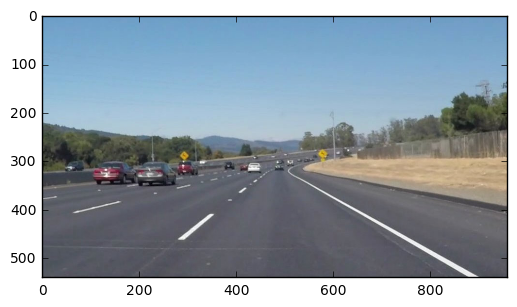

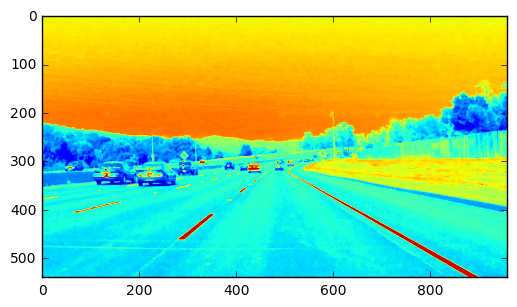

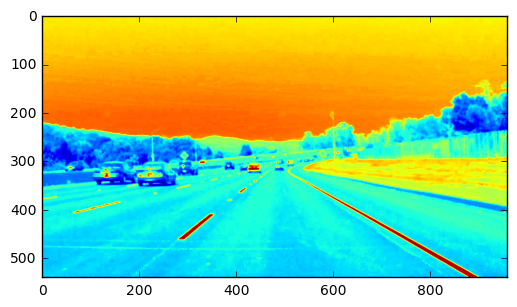

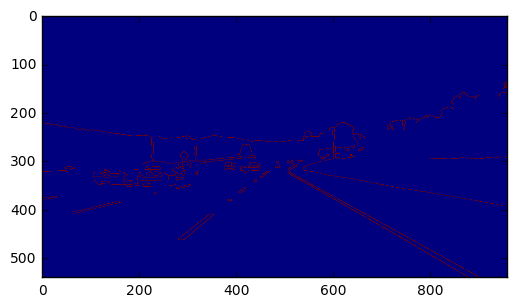

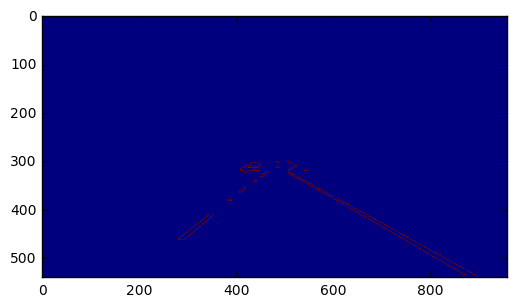

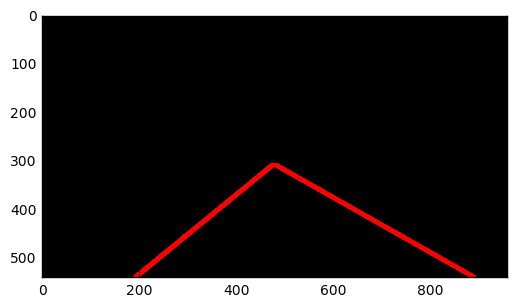

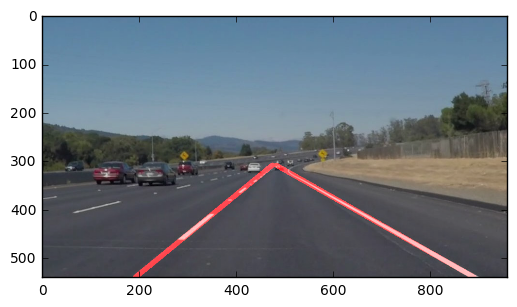

In [66]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
imagesList = os.listdir("test_images/")

img = mpimg.imread("test_images/solidWhiteCurve.jpg")
new_image = np.copy(img)

plt.imshow(new_image)
plt.show()

gray = grayscale(new_image)
plt.imshow(gray)
plt.show()

blurred_image = gaussian_blur(gray,5)
plt.imshow(blurred_image)
plt.show()

canny_edges = canny(blurred_image, 50, 200)
plt.imshow(canny_edges)
plt.show()

imshape = new_image.shape
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
masked_image = region_of_interest(canny_edges, vertices)
plt.imshow(masked_image)
plt.show()

hough_edges = hough_lines(masked_image, 1, np.pi/180, 50, 10, 50)
plt.imshow(hough_edges)
plt.show()



final_image = weighted_img(hough_edges, img)
plt.imshow(final_image)
plt.show()


# for image in imagesList:
#     img = mpimg.imread("test_images/"+image)
#     new_image = np.copy(img)
#     plt.imshow(new_image)
#     plt.show()
    
#     gray = grayscale(new_image)
#     plt.imshow(gray)
#     plt.show()
    
#     blurred_image = gaussian_blur(gray,5)
#     plt.imshow(blurred_image)
#     plt.show()
    
#     canny_edges = canny(blurred_image, 50, 200)
#     plt.imshow(canny_edges)
#     plt.show()
    
#     imshape = new_image.shape
#     vertices = np.array([[(0,imshape[0]),(460, 300), (490, 300), (imshape[1],imshape[0])]], dtype=np.int32)
#     masked_image = region_of_interest(canny_edges, vertices)
#     plt.imshow(masked_image)
#     plt.show()
    
#     hough_edges = hough_lines(masked_image, 2, np.pi/180, 15, 40, 20) 
#     plt.imshow(hough_edges)
#     plt.show()
    
#     final_image = weighted_img(hough_edges, img)
#     plt.imshow(final_image)
#     plt.show()
    
#     new_name=image[:len(image) - 4]+"_new.jpg"
#     cv2.imwrite("test_images/"+new_name,final_image)

run your solution on all test_images and make copies into the test_images directory).

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

In [67]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [68]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image with lines are drawn on lanes)
    new_image = np.copy(image)
    gray = grayscale(new_image)
    blurred_image = gaussian_blur(gray,5)
    canny_edges = canny(blurred_image, 50, 200)
    imshape = new_image.shape
    vertices = np.array([[(0,imshape[0]),(460, 300), (500, 300), (imshape[1],imshape[0])]], dtype=np.int32)
    masked_image = region_of_interest(canny_edges, vertices)
    hough_edges = hough_lines(masked_image, 2, np.pi/180, 40, 40, 20) 
    final_image = weighted_img(hough_edges, img)
#     plt.imshow(final_image)
#     plt.show()

    return final_image

Let's try the one with the solid white lane on the right first ...

In [69]:
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4


100%|█████████▉| 221/222 [00:01<00:00, 122.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

CPU times: user 1.78 s, sys: 772 ms, total: 2.56 s
Wall time: 1.94 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [70]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

**At this point, if you were successful you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform.  Modify your draw_lines function accordingly and try re-running your pipeline.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [54]:
yellow_output = 'yellow.mp4'
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

494.356457171
106.914043113
485.904743527
836.205260622
[MoviePy] >>>> Building video yellow.mp4
[MoviePy] Writing video yellow.mp4






  0%|          | 0/682 [00:00<?, ?it/s]



  2%|▏         | 13/682 [00:00<00:05, 122.83it/s]

494.356457171
106.914043113
485.904743527
836.205260622
492.40776856
109.185705414
497.372658356
824.162011455
460.895104104
122.949814493
511.965380843
830.530197527
458.433514077
119.921310767
516.705670786
825.974130079
459.597767128
120.584441798
516.051597101
832.179897954
467.206120252
120.901800389
514.681971042
829.114479215
481.569171086
124.922038554
500.441956733
819.393485689
488.023134534
127.225340508
500.632966152
829.511412477
486.273096582
130.215664187
497.007925484
834.551712297
466.253669249
139.422088431
505.962152469
836.047948658
472.86501288
130.984933912
497.647592148
846.370013692
479.724742303
130.901748396
499.541031593
842.742234937
466.455615769
132.521034688
508.266320496
847.468893999
427.259932607
139.76967881
545.640344797
851.854102761
464.982241505
140.952455622
509.785980477
851.29347248
498.495356036
135.614620586
484.032570749
849.128037541
462.743300711
144.397077963
509.361087321
853.885223254
487.047282222
143.676370012
489.738901194
834.381686




Exception in thread Thread-5:
Traceback (most recent call last):
  File "/Applications/anaconda/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/Applications/anaconda/lib/python3.5/site-packages/tqdm/_tqdm.py", line 102, in run
    for instance in self.tqdm_cls._instances:
  File "/Applications/anaconda/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



465.438662116
144.344649978
507.417617188
849.642166452





  4%|▍         | 27/682 [00:00<00:05, 125.49it/s]


  6%|▌         | 41/682 [00:00<00:05, 127.36it/s]

464.603630896
147.237158981
510.584820561
860.267913893
459.277116988
153.222704837
506.398653284
867.590935691
472.577406105
146.459687611
506.73855988
857.408413402
461.409163516
155.794985449
515.0205268
865.787757737
477.408817493
154.293071131
495.653370175
852.189948117
483.055354242
149.634831521
494.721153678
837.238014625
459.12111335
148.606945893
512.153295972
867.349860226
478.338179603
156.924704119
492.799914926
858.356171852
483.572460996
154.895587126
493.14428017
844.731353832
477.348248276
159.796704022
492.685804621
858.130214472
449.581404031
157.631579285
521.625537955
866.266769833
473.915754556
154.605910246
494.879030437
869.851833338
480.181753839
150.779550414
495.955286928
866.554866459
476.757894957
155.019458844
500.509945374
867.263875568
461.46395801
153.038569591
506.50384928
877.085291727
455.928702457
152.606491929
511.461993692
871.073369616
461.012779958
150.795985287
511.07752412
870.01371558
460.373050114
155.874475735
505.299635036
873.991188738
4




  8%|▊         | 54/682 [00:00<00:04, 127.24it/s]


 10%|▉         | 67/682 [00:00<00:04, 126.01it/s]

475.011799054
152.86887702
490.220992186
859.193120868
474.383803328
153.724920751
492.526033001
858.926511399
455.08176573
142.328770221
512.100555544
853.195555649
460.753610255
151.995982456
503.296538025
846.925936436
457.623687725
146.805278178
499.149194378
878.885635927
476.238863297
147.520569166
488.267775801
856.037658938
474.262689014
147.524886231
484.463816868
864.284839986
483.929071211
146.285421484
477.560015457
854.860437591
472.44980116
141.606138859
492.346621172
850.998708534
472.326076831
147.852779013
491.859906381
851.289941365
480.602752438
143.417426447
485.666560602
856.630762912
479.539206254
141.735767259
489.205772723
850.161956997
478.379846694
146.814448882
470.344872969
865.731840985
481.137013767
140.848259795
495.520101382
834.63753755
482.350376222
145.259303115
479.441393994
840.893657553
481.409437481
149.072430821
479.544271161
852.517733618
464.284372008
144.294071328
497.439754401
841.703592535
480.446345607
143.390337319
483.643719662
846.827487




 12%|█▏        | 80/682 [00:00<00:04, 126.11it/s]


 14%|█▎        | 93/682 [00:00<00:04, 125.14it/s]

474.188324649
144.366120428
490.069264593
844.801900478
484.019280259
148.47679415
480.49515747
824.788594823
448.024732572
144.038953884
509.971097966
840.035228026
446.779942694
142.511585714
510.83446154
854.085123429
480.5313538
142.343180861
475.141194105
848.360827933
482.911538372
139.696401383
474.725594226
846.041412095
486.565999388
137.802052224
477.510418064
843.654991969
455.455531284
136.263416256
507.997973593
850.622866698
484.363633838
136.084418471
483.796546885
838.524072331
485.231405101
136.024201848
478.324308234
847.386337369
487.4091433
135.929611578
474.570296884
847.607864891
487.011571672
137.343025054
476.187616198
846.274126834
485.781338346
140.577737293
468.841101771
849.028478629
491.409229563
141.34212967
469.119739401
844.952775863
489.706409892
145.177010844
469.17156557
843.677386806
488.344256769
143.1860662
469.940511147
842.387813921
491.504107072
140.969877559
473.774253731
842.805422973
489.930316157
144.652786567
473.383789393
840.907588679
489




 16%|█▌        | 106/682 [00:00<00:04, 124.19it/s]


 17%|█▋        | 119/682 [00:00<00:04, 124.48it/s]

491.842912635
134.255487731
482.312269973
835.09890772
483.107189687
146.992425088
478.921846956
836.886711168
478.191506278
146.351562561
478.661339877
843.510462462
491.135657238
137.641288371
470.98850461
860.381242246
484.269171205
142.135984204
481.260705366
824.433337879
490.103043124
139.942149762
474.766837869
843.134358671
487.297311081
143.118487215
475.9256889
840.104883407
486.6858149
146.409417942
475.800296475
843.451682252
484.815743115
144.339317719
474.832938902
849.322582817
491.980926058
138.349601577
471.56870599
854.159800733
493.67284465
131.54870879
480.543082488
847.611416656
482.546949106
148.267382709
480.164604393
844.382748799
487.883201272
140.640347364
478.862834992
847.7317427
482.582459337
154.096271416
477.458791803
841.924196854
485.841829769
145.62984914
480.187826707
838.48847616
489.576040888
143.561350371
478.390722774
837.914143774
492.125956924
148.689950783
472.504970739
849.790347268
484.193303308
145.434386472
483.393018293
847.438024763
488.5




 19%|█▉        | 131/682 [00:01<00:04, 122.63it/s]


 21%|██        | 144/682 [00:01<00:04, 122.10it/s]

490.305832745
154.563576113
468.59473152
854.253757664
485.651511558
150.56864418
484.113208811
851.062604255
489.220403954
152.623319177
471.729301125
852.330444403
495.471463398
147.250445154
475.594463255
840.667181715
492.086713341
149.136046207
473.15355576
847.316608324
469.834411833
147.946744668
493.877642869
860.032787684
480.338579127
148.633004127
482.836222841
846.204808731
499.94881238
129.724576978
469.515188716
851.884840926
483.511244906
152.671832792
474.118469224
853.87023597
477.159013167
149.071369557
483.628997863
857.284702758
480.821765821
143.212263432
478.261581752
857.293641082
471.857102548
148.386567838
493.340568829
856.579025947
464.3143934
151.315185475
497.544377505
855.136096412
480.438681999
153.115865459
484.925623025
854.18432313
488.56921123
152.488097572
469.010079452
861.788125397
488.590363895
143.017757095
471.727286347
857.05733882
476.475200354
141.911614559
486.483729919
863.208592419
493.650610948
143.251926883
473.613976097
851.19228461
481




 23%|██▎       | 157/682 [00:01<00:04, 121.72it/s]


 25%|██▍       | 170/682 [00:01<00:04, 120.85it/s]

467.080755638
155.196486349
506.002586862
855.083151444
497.935185586
145.061367379
471.691732655
855.52912848
506.741356097
150.175710388
473.363952397
872.046366364
502.731413672
151.268477471
457.623431826
877.018038972
503.911483154
157.42593861
455.477314461
874.602647944
498.129637721
154.318659865
468.379834356
858.040213964
497.143554202
165.618211717
460.52175566
885.258769216
482.824660468
163.906995455
485.293441178
864.806638588
496.905361149
166.017707634
455.403179387
891.630290824
495.540712331
167.498428908
469.00005471
863.73710829
491.437284504
161.45569578
465.348228735
876.861634989
502.694819971
145.347637399
466.895154014
876.275865957
493.084235666
158.438489164
479.687970483
872.169172336
508.12263672
141.504536187
469.282653146
868.610125125
492.784400137
170.754470931
468.797816097
874.825318674
498.383561781
165.713076062
469.449913091
866.824417102
492.816790532
164.335314359
478.967523999
879.540004603
498.4203636
166.284825984
464.810145176
887.241696382
4




 27%|██▋       | 182/682 [00:01<00:04, 120.22it/s]


 29%|██▊       | 195/682 [00:01<00:04, 120.80it/s]

490.03452797
175.65695429
463.599557608
888.634263254
489.322378202
177.974303805
464.65707632
914.807786325
488.787135107
168.082536137
474.385535657
898.370690668
499.262510143
181.76542984
456.134106734
921.822465921
480.130071342
182.023997556
471.794006779
902.951477297
498.002201481
158.38757156
468.758350593
899.43259101
494.870669251
181.176099492
456.851355643
900.96397704
495.080997177
151.881219166
465.028317995
892.393103579
497.426649799
173.898374348
454.244218985
904.017210782
491.762389816
171.943186464
465.379481253
896.54620914
497.844176435
163.713010514
456.983433238
890.505163991
501.994884171
157.669168275
463.487587451
881.502452959
495.67932521
158.916131098
462.872031297
884.75036281
489.188976279
152.884994543
461.82745731
907.056550768
498.722704844
148.398911723
462.358663372
878.237429057
488.445867425
178.052288316
463.584541881
880.28941491
477.026701248
179.271738679
475.278934561
890.393567891
476.363283771
148.982510557
488.403104114
880.634161968
477.




 30%|███       | 208/682 [00:01<00:03, 118.61it/s]


 32%|███▏      | 221/682 [00:01<00:03, 119.44it/s]

487.333885925
169.359230508
459.850821688
878.337545605
487.853934727
172.440644443
464.204650947
870.175992767
480.25797749
166.88800984
464.915247002
865.222016746
490.949546845
167.135475564
461.498568584
873.396980371
477.792372406
171.81425365
473.201172423
880.198597453
485.152602405
163.580884422
465.538956334
867.326330793
477.086795564
154.261075115
479.539854425
874.902460341
488.406968085
142.903539513
456.048669036
886.545703119
476.832075459
166.509019797
471.782996692
865.344083649
482.834689783
148.532401142
469.394390873
869.329884647
488.432368935
133.442375979
458.309798965
863.77614924
491.70731585
156.266342005
454.563690297
872.121721127
487.05716683
157.792808438
459.148821689
869.6052395
485.597835531
160.337220992
458.167890302
869.812868499
493.314962375
158.557841777
460.985889145
860.773572189
488.263617291
158.898441036
460.843948855
859.268426716
484.966649217
161.243966074
465.113159409
854.407382406
489.417461775
158.22810824
457.836725499
870.773701588
4




 34%|███▍      | 233/682 [00:01<00:03, 118.53it/s]


 36%|███▌      | 246/682 [00:02<00:03, 120.11it/s]

482.132453452
161.168487782
474.068223585
865.90017629
488.873526402
151.376617867
467.027780084
861.04968412
488.11462461
152.623455026
466.672915732
861.190794556
490.201744853
152.882109829
467.597069922
852.009999773
491.022646395
143.788088339
464.521216687
863.802538431
486.761684658
155.670054493
468.117570263
858.866535492
486.982112237
152.100523517
467.591616767
860.04690464
481.942343758
149.424024674
478.410610721
861.450843677
487.583093691
155.217707389
459.668708183
873.216069922
481.89270003
143.470784191
480.242514258
858.805240686
479.539066112
145.145999398
475.462009594
864.97259107
479.066388935
150.877040389
469.149129827
866.347493877
500.849973487
136.365361423
470.410911466
856.869000971
483.284039564
145.856718737
475.24261982
869.631094594
484.57539118
128.541765706
479.729321517
858.948663296
474.447408578
161.791464748
481.16966581
858.984575835
486.998719539
149.062521225
467.547859863
856.887282464
493.60543964
147.293737129
458.422470857
871.75123457
474




 38%|███▊      | 259/682 [00:02<00:03, 120.17it/s]


 40%|███▉      | 272/682 [00:02<00:03, 120.46it/s]

478.175035191
155.926210118
473.986765606
859.966163111
476.142858982
154.751106754
476.064092185
860.083754855
478.568534659
160.116772867
472.622363077
855.06116919
481.03810499
159.847239349
469.529877169
849.731570215
481.334585672
160.038386054
472.182383532
853.680348273
478.059821773
162.783049087
468.32951306
856.661316435
483.571395374
150.473782458
470.610923062
850.870079476
482.953179941
160.23753555
462.041711384
868.707727065
497.059921636
151.806176543
452.175575864
873.059272807
486.88846523
161.461287756
450.256804001
882.47140735
483.061960396
154.987369175
463.405285011
865.934972957
485.817659304
159.817025707
461.052116361
869.021838078
481.356051797
154.481605567
467.48862333
863.155471317
487.547374475
155.619792888
462.495610214
863.364417088
485.376558866
155.851798828
466.595097586
862.756107798
487.879110594
158.019421288
464.188298132
866.227873996
493.788068451
157.742512546
455.901034783
889.527991303
494.841666273
149.557335863
458.327450642
884.076785958




 42%|████▏     | 285/682 [00:02<00:03, 120.20it/s]


 44%|████▎     | 298/682 [00:02<00:03, 118.86it/s]

494.386011471
160.724620973
458.42020133
871.034383418
495.68048775
158.591774839
455.831812908
870.55304964
494.106655354
164.236108576
452.144917373
870.996684095
494.323222931
161.888381414
461.875326547
862.137996668
497.332774105
163.105842659
453.688862111
866.867898107
492.931247042
162.371377928
455.511640674
870.666356849
489.918890668
158.253661275
454.982722213
873.089604185
491.474417944
161.621812833
459.843574747
855.148495055
489.215359895
148.340056113
469.742722956
861.812524735
498.578408771
160.762556723
453.682714027
862.459009368
490.094384814
161.972441738
460.462711078
861.527304798
476.870488065
159.993780532
470.65093256
857.691684843
496.441140511
157.832696906
453.516610881
849.968164958
495.618304541
163.834936614
447.050536898
865.399651818
496.439073105
161.805003807
453.055196719
862.774340156
487.887404254
157.166254983
466.024596066
851.826940425
495.726342346
162.249116582
463.072008452
834.407422411
489.766526382
154.30484398
466.672862764
861.4919897




 45%|████▌     | 310/682 [00:02<00:03, 117.73it/s]


 47%|████▋     | 323/682 [00:02<00:03, 118.69it/s]

485.755681108
163.506404536
465.18741575
857.73113605
492.228384571
159.447428011
462.631793234
854.273137371
495.669158929
143.399575078
450.360143672
866.514013754
488.162788169
157.607820071
464.208924479
855.984863493
486.403053067
155.134117507
463.847762134
859.041723582
485.437903495
163.170589554
462.477519454
858.895885221
494.765578506
141.648848224
463.703427179
861.108446997
482.626543291
158.797965147
463.183925701
864.737065858
490.307840957
155.188945813
463.358120569
862.787769145
471.997959612
159.091002893
476.42977371
864.659430497
492.675056473
146.873612292
462.751599999
858.61610378
489.041621126
142.683595429
476.308153585
856.707043397
486.811558856
152.677091792
467.108613857
854.548716212
483.678811257
153.998274558
464.158124822
859.210049768
495.566053425
131.27053934
461.266266193
864.746682565
483.389732033
147.750947013
465.634407024
870.478588642
484.107913421
152.883824625
464.458357435
873.139865721
484.941865268
158.192726657
464.312117896
848.4091157




 49%|████▉     | 335/682 [00:02<00:02, 117.09it/s]


 51%|█████     | 347/682 [00:02<00:02, 117.09it/s]

487.320552735
149.685841712
453.231564979
864.635914932
489.670024225
155.312021587
462.842786922
852.037292417
486.344197444
150.081407149
454.239808678
860.638875745
472.2942155
148.929194555
474.810818146
858.640618937
485.132730858
150.187974874
465.007352441
858.436912331
475.447198531
145.554910896
471.206624888
849.899552372
483.916503217
149.652648333
461.736621057
847.840983665
490.468594981
145.370899691
460.958006289
865.868473727
487.243173622
146.60244543
462.740250759
857.753103262
497.621529364
129.338437484
456.935096738
867.458070631
491.705547863
142.867223168
448.613074197
877.376856246
469.713782154
145.161233759
487.164850389
850.966280728
489.334135078
143.245654059
462.599909663
852.164772169
477.857243523
146.234344248
470.487407349
847.581447255
488.909104154
140.893238183
455.379959567
854.198603681
479.81273718
140.611156564
474.990685949
849.473178436
484.959329736
140.442998288
469.172702419
857.141575116
491.585226722
135.698331835
465.92947421
848.2748503




 53%|█████▎    | 359/682 [00:02<00:02, 117.93it/s]


 55%|█████▍    | 372/682 [00:03<00:02, 118.50it/s]

478.027138546
146.496457829
479.836880133
850.057710704
486.103283807
142.499381474
469.064659483
852.293490177
470.87385931
150.923830208
483.192306166
849.749025809
480.670802368
144.111810142
479.135323195
849.464330292
482.03528545
143.83789247
466.520659753
860.472039232
476.907490509
147.065886036
472.216689661
851.407671872
466.719947179
144.627329653
484.672528331
861.132082845
482.121782659
144.725155781
463.826183364
862.64654945
475.60067815
153.023497338
468.118776022
856.425585728
484.01405236
142.792789689
473.197826453
845.086980529
484.479480455
144.603209691
468.01303623
850.951664011
487.732198955
137.886067611
463.399231294
851.951467678
480.454965399
144.794187915
474.388657344
851.937937511
483.277549817
149.193806861
465.794669406
853.030857011
482.140862472
150.769410414
462.550247004
862.342147457
487.691149793
145.363053532
459.85022833
859.16612564
488.056268738
144.416021335
466.708393851
849.426620242
479.853050313
143.653801133
461.715983479
893.419788759
4




 56%|█████▋    | 384/682 [00:03<00:02, 118.47it/s]


 58%|█████▊    | 396/682 [00:03<00:02, 118.46it/s]

466.241462275
143.497888194
479.587284103
854.769261452
471.465809367
138.886800703
471.201728864
857.241348768
481.756646325
137.033108865
460.75068648
855.087694796
475.125563744
145.220688969
459.337538321
856.620045724
467.184155499
146.361563501
468.430531167
856.913503476
475.250191833
143.252976263
465.418094851
848.12918298
481.923417668
144.385104533
461.374279298
857.943293337
478.384283965
145.310250377
464.323528672
860.316196835
489.649592173
139.197955996
456.806735056
861.053976224
480.012903919
137.836016521
467.178602581
852.754751174
472.804078377
150.061211687
465.126036507
854.408116981
479.206143636
134.142492675
466.264737541
855.774762611
478.359855568
147.619649738
462.313024507
855.939441133
487.992022769
140.14759055
458.49843699
854.347869543
490.144802831
131.776875842
466.01099374
843.280426931
482.143279049
144.092331053
466.189430238
844.455804989
483.596440472
136.189584619
464.090817638
851.566756353
491.71390087
126.067753998
470.254982541
834.35345787




 60%|█████▉    | 408/682 [00:03<00:02, 118.40it/s]


 62%|██████▏   | 421/682 [00:03<00:02, 120.33it/s]

465.464121907
132.224614006
490.84013932
834.087591934
468.199979867
134.666341181
484.163589498
835.177739093
478.587273145
130.96929177
477.490294798
837.479475
485.013971113
130.977579436
468.930486343
839.760752766
488.304092533
135.162902862
464.813670087
841.596664698
476.903404367
137.794047923
475.386810716
825.246844697
468.065847469
140.76628794
477.977814662
835.111048143
481.863993482
137.930235906
468.48668425
840.102557651
479.601114216
134.337437689
473.664338382
839.683222131
482.935899824
140.965505399
470.205197257
840.513975188
479.333549913
138.533799561
470.096560415
837.47424742
484.964329579
138.878924393
470.368477449
837.85701009
469.679531586
137.564172518
490.202400425
831.556257037
283.114217758
135.002392228
681.236495096
838.257481734
439.139710242
138.84037542
510.286935705
844.049736227
468.872030129
118.981575432
501.019723255
841.557188392
487.123230264
135.086861653
470.7132143
846.123410735
482.264717872
141.511996495
473.112450776
845.677772988
483.




 64%|██████▎   | 434/682 [00:03<00:02, 121.71it/s]


 66%|██████▌   | 447/682 [00:03<00:01, 121.47it/s]

470.147887986
130.296808452
490.633379676
845.268907323
482.313858635
146.614159905
470.661417473
852.493615873
493.463900033
130.225591836
476.445138252
845.686396312
480.462020727
149.950796014
474.378329037
843.746438993
495.049926047
127.320798677
475.272417517
851.033204653
485.641616661
137.724274939
477.236807214
847.653066629
489.194231555
137.906786843
478.281996385
837.783752723
476.333083663
142.045297396
475.073050412
848.602161582
484.492063082
137.167728184
469.556095941
845.879255357
485.541065665
133.219857252
473.940120739
845.689719834
476.18869194
138.923904035
475.267007693
845.866311008
473.904493426
142.570858399
479.273269013
844.120815408
480.005983272
139.706203879
478.268995749
840.023388075
476.858439923
141.362346518
472.82776406
852.063133405
481.13131404
139.616106782
472.227201698
845.891181353
475.029352978
145.075761994
471.590837412
847.390555318
475.868267007
137.582885131
478.513004916
835.058175021
475.753215357
135.799057747
477.447331304
850.66747




 67%|██████▋   | 460/682 [00:03<00:01, 120.81it/s]

498.757269346
127.946611018
470.576700159
842.977171629
472.926116705
142.698575499
475.082009618
843.843884311
486.456586827
136.962429048
462.455151934
858.197055698
493.041519153
122.094403741
473.754810083
850.145690926
472.734113552
131.274977265
478.374398795
855.09531794
482.595682885
134.327638145
472.925479368
848.024312975
486.837650601
131.01406222
473.125442688
843.659134969
487.622783341
127.810793965
475.477448473
836.60278274
483.301267199
118.170015761
473.629569388
853.268738366
488.615377179
128.047286283
477.801931806
832.522751851
485.564086016
130.124961861
474.580643065
845.135232857
483.920100557
132.512423719
470.69954732
854.696206223
480.120191061
134.753994028
476.428030864
843.292856898
467.620812606
136.776217471
481.247159002
848.394241464
489.965640978
133.536307727
466.462349553
852.174337785
479.155381925
142.084319597
469.60729283
857.4149542
480.773262204
133.689719652
477.583038762
847.101437903
482.135875292
139.710495756
482.573543024
817.5146432
4




 69%|██████▉   | 473/682 [00:03<00:01, 121.30it/s]

491.806606579
134.334987364
459.240137608
844.367402391
489.832649331
143.619830568
459.126479416
846.717148099





 71%|███████▏  | 486/682 [00:04<00:01, 122.18it/s]

487.445978244
143.151231141
464.991563008
840.100675698
495.460444881
132.746023015
457.549993491
848.11977726
473.317504401
131.071012076
476.588864135
855.728508608
500.241312643
120.485872153
455.423959632
851.285806079
485.165157953
142.216154889
461.881228668
841.982695329
477.982874969
136.352705338
486.418349826
834.084500121
475.19893261
135.312415699
485.807994834
857.828436351
473.753202644
144.847068382
488.264873602
835.325774163
472.982918206
146.041765075
484.650552162
851.606083204
475.46929891
149.589251159
483.050003937
840.416863167
485.854332699
131.354370827
470.300171635
850.609186656
478.415887291
142.438715565
491.767024299
836.49428621
481.887602436
139.150715625
486.599954565
837.736672282
478.049053319
137.058905561
483.868355386
848.109060036
476.052461044
131.889401267
487.500402368
843.198057164
480.681625766
134.295688262
485.136658194
840.265872491
475.03444755
135.365478397
487.635309958
838.909677419
477.873731977
134.214509921
478.998320605
846.3834995




 73%|███████▎  | 499/682 [00:04<00:01, 121.58it/s]

484.192251248
140.564647711
474.110429898
849.247544177
489.230656765
147.118138282
477.872677128
851.709027239





 75%|███████▌  | 512/682 [00:04<00:01, 121.14it/s]

486.023319375
148.457655161
473.267312926
852.430902582
485.532458307
140.215029854
474.972052383
851.037007559
480.981890277
149.556866072
487.582508019
849.982089061
482.264954659
147.118738948
482.626483014
838.77993564
479.106922092
145.862022238
482.641182316
842.832006086
485.483534805
147.793068104
476.002570397
841.91707549
487.717758271
139.932090752
476.176069638
844.034656465
483.913757317
141.344731242
475.245142694
848.797026255
470.851008336
141.877345426
478.902078681
861.963642014
479.363341988
142.335976744
465.88747057
862.771980562
459.613776845
141.338094413
502.454813756
850.102674751
478.792714502
144.37959313
477.312681783
847.975016934
475.145291584
137.32386986
482.843414292
845.991523892
475.748944845
139.501399981
476.418467873
847.755965623
424.96225924
138.871003743
534.002001358
846.600239745
466.154438591
134.289786374
487.699413407
849.765827118
464.278685472
140.641690108
492.034394378
836.575741288
470.181318487
140.352395758
487.814032968
846.72218609

478.513345706
139.106986592
485.242340271
843.805317927
494.856411068
131.946691414
476.033269882
846.478349632





 77%|███████▋  | 525/682 [00:04<00:01, 120.33it/s]


 79%|███████▉  | 538/682 [00:04<00:01, 122.06it/s]

484.427907184
134.643109673
481.794191232
844.515365965
484.273041541
143.131699323
473.274566559
847.772986302
471.057656574
143.59959905
498.886894818
844.189262743
474.393092802
140.948038219
493.712828623
847.379656487
474.205481886
145.62355515
496.50056018
838.645495344
492.401793987
142.520444276
474.832035194
851.24688531
477.847876367
144.20125742
492.280507123
837.580831941
470.927359725
148.732703913
491.843254653
849.0565845
464.600674755
150.66980358
500.612144272
844.110624222
466.873576679
150.016050229
497.160016165
848.507631093
481.774526288
142.231078548
491.199820868
843.12496008
475.957180859
151.696499319
491.810528853
843.794723191
481.501535451
146.057936918
487.167467687
849.570982682
466.983975486
147.914100193
502.440471819
845.44164521
477.312072533
148.205257022
482.981411133
854.246272824
481.589604871
150.061200714
485.738961103
851.719374692
481.248585871
152.351989909
485.888704108
846.982018001
483.037630369
147.010550056
486.828649491
849.383263463
48




 81%|████████  | 551/682 [00:04<00:01, 121.79it/s]


 83%|████████▎ | 564/682 [00:04<00:00, 122.35it/s]

487.337217767
154.169714751
482.832480046
857.75128256
488.133330011
145.007912786
489.483850418
849.97896035
483.058604661
151.970323058
482.722367017
849.429288598
482.706396902
156.49049241
481.834574343
849.522551394
494.580137133
148.396274731
476.718325386
843.119432997
473.56936794
156.090618326
492.503554498
853.967052865
483.389662785
160.630458897
477.497975466
857.769130169
489.343722511
153.152115337
470.029677804
871.103317189
482.023735933
144.761014788
489.23072846
859.817706241
482.455954898
154.827867155
483.97431046
855.95466215
499.644641502
131.600374412
475.078250148
860.419891125
483.746603982
155.055809367
481.427164745
863.789228749
490.585613042
149.983990115
484.598642644
861.690240533
493.671614594
149.106589116
481.557698433
862.071626717
484.714524248
155.686784989
481.823680056
879.574514594
486.626493286
153.691831641
485.772423786
862.797894705
490.615011237
159.79446772
481.347422289
871.220046623
487.970291871
164.098932591
483.219354423
859.399555797





 85%|████████▍ | 577/682 [00:04<00:00, 122.50it/s]


 87%|████████▋ | 590/682 [00:04<00:00, 123.55it/s]

484.672669027
158.376189119
501.510499321
875.086166428
490.410177
165.472424994
483.530763838
881.073047358
475.144964178
172.393695902
497.037782682
859.487964439
492.42705291
171.044747774
480.208924426
870.064675415
490.922183577
166.174662018
477.637476255
887.800127888
490.686675131
144.753987768
481.407095633
886.759171205
483.963954127
172.812614095
477.814968295
881.353559805
471.936549601
179.087683323
491.707665216
883.684462399
488.716545357
174.949174378
483.099723834
877.125271376
484.225198169
171.661027406
491.466558122
880.993449061
465.683077582
177.048242425
498.153175449
884.827843563
483.677218035
176.890546331
480.592875931
886.499352457
483.382258363
170.036654127
475.105347488
887.359276189
477.598691744
168.041087396
496.70269654
879.261561685
483.616765939
173.807576037
482.001530516
884.817108179
491.461598413
177.678757071
479.130792973
882.120432436
485.910241733
180.552426298
474.442637248
880.32955363
482.007622515
184.500264485
479.785004899
878.75545856




 88%|████████▊ | 603/682 [00:04<00:00, 123.58it/s]


 90%|█████████ | 616/682 [00:05<00:00, 122.74it/s]

496.148204608
177.384434251
475.712297634
881.1750934
490.012656853
170.780285425
477.234390651
886.655061688
491.656041849
173.409973552
476.805295988
899.973520058
478.289914322
163.343533156
502.403219924
881.812299245
473.061283115
170.622725822
495.627610321
888.442880085
489.963414146
179.746636869
475.760269629
886.893201997
490.499582889
176.888235234
472.225342912
899.510377154
493.929568583
182.353162789
465.82968721
888.717193293
484.668797954
176.126598465
480.749586294
879.584865158
491.015647448
150.01033976
467.506466927
887.142576554
490.272471809
178.773766473
480.235188327
883.735196153
497.105634051
182.762933445
471.079387428
887.129724994
487.299091018
183.290704841
465.044576591
891.220939014
485.248342101
178.413607011
479.400703429
897.584977729
491.81290896
185.140947086
480.667594387
874.35422976
488.515767383
184.995883229
480.331954785
883.137350656
493.42883545
172.71893229
469.560617954
887.646561926
496.143288211
189.347428859
470.062110864
879.210476663





 92%|█████████▏| 629/682 [00:05<00:00, 123.40it/s]


 94%|█████████▍| 642/682 [00:05<00:00, 124.04it/s]

492.714288723
174.133508801
467.221323698
896.912518361
487.343649799
177.380662324
472.706812628
893.138003822
488.825471698
134.108490566
471.565282301
886.858213436
490.268197574
137.443240901
472.105177867
891.217563186
nan
nan
467.146339218
885.58659931
490.083333333
171.583333333
470.215521443
891.125715898
497.895179482
164.840081824
462.809013661
893.591784725
484.547604499
150.059002475
474.204905754
886.879235892
492.621613868
168.240866408
481.336373107
880.424696407
488.476190476
188.142857143
473.3957324
880.598383501
498.848402422
144.641120338
468.637604475
886.943706581
491.744362546
155.929914217
467.906659013
884.329510118
482.125128645
146.096312178
465.669609455
893.778029057
491.932905945
156.968190168
466.035859255
875.749115828
477.434116316
176.98695498
474.253256733
869.204667329
489.771445011
168.959020072
461.247495529
882.243850265
453.231881543
96.5487301915
501.610391958
870.690451233
487.402319523
165.324679471
468.514819091
889.705542726
480.473674775
17




 96%|█████████▌| 655/682 [00:05<00:00, 123.38it/s]


 98%|█████████▊| 668/682 [00:05<00:00, 123.65it/s]

483.462911822
180.717809115
477.66068531
860.426558454
488.191799507
176.049030473
468.712622333
865.510393264
485.742963293
155.413984789
478.859820078
863.494542791
479.992097102
164.523789489
484.57405776
857.402198856
483.871403669
147.189158619
481.655599471
862.634381508
490.635118525
156.009645663
468.694814881
865.276727079
477.74301164
171.43691885
476.487258427
870.585031098
485.068726469
156.315939329
476.749116896
867.453037265
502.170229582
116.741680982
463.230501329
865.069911788
486.561620823
157.597611001
471.779425248
863.359672813
484.254610993
166.034957496
469.590089435
867.003752242
463.853805593
149.356874456
493.034165645
869.259855259
486.613892929
160.260716241
469.835397817
862.792385107
477.871606727
163.790037792
478.012671116
877.170745364
481.193682441
129.763231585
478.444255423
872.080435594
475.155119793
145.109138082
494.318779652
865.47671618
480.40171521
136.255098052
484.914768955
865.706072743
500.962530856
146.726846724
467.791340144
869.63222801




100%|█████████▉| 681/682 [00:05<00:00, 124.17it/s]




481.148068494
137.193442961
483.058273549
864.578663003
486.839352023
143.487571972
478.074441818
853.875751086
479.701027128
148.213956944
477.997514262
872.720412795
475.197352936
168.258369423
478.904676261
874.401420696
[MoviePy] Done.
[MoviePy] >>>> Video ready: yellow.mp4 

CPU times: user 5.49 s, sys: 2.4 s, total: 7.89 s
Wall time: 5.72 s


In [55]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Reflections

Congratulations on finding the lane lines!  As the final step in this project, we would like you to share your thoughts on your lane finding pipeline... specifically, how could you imagine making your algorithm better / more robust?  Where will your current algorithm be likely to fail?

Please add your thoughts below,  and if you're up for making your pipeline more robust, be sure to scroll down and check out the optional challenge video below!

Since my algorithm is totally based on finding the average slope and intercept, I think it would fail drastically when dealing with curved roads or turns since they present outliers and thus skewing the average. I'd say that my lines are biased towards the left. I tried changing the hough lines parameters without any luck. The algorithm can be improved by taking the previous position into account whie calculating the next position. Something along the lines of regression.  


## Submission

If you're satisfied with your video outputs it's time to submit!  Submit this ipython notebook for review.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [71]:
challenge_output = 'extra.mp4'
clip2 = VideoFileClip('challenge.mp4')
challenge_clip = clip2.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

error: /Users/jenkins/miniconda/1/x64/conda-bld/work/opencv-3.1.0/modules/core/src/arithm.cpp:639: error: (-209) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function arithm_op


In [72]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))